# Prepare Data


What is it? 
- the stage after acquiring our data that ensures our data is ready for exploration and eventually modeling

- Pipeline: Plan - Acquire - **Prepare** - Explore - Model - Deliver


Why do we care?
- because we need our data to be tidy and clean for accurate exploration
- because we need our data split to be able to adaquately evaluate our model 


How do we do it?
- start with one dataframe from acquire
1. summarize the data
2. clean the data
3. split the data: train, validate, and test
- end with `prepare.py` file

## This Lesson - Titanic Dataset

Project goal: predict who survived the titanic

## Acquire 

- use my `acquire.py` since i've already established this step

In [2]:
# get titanic data
SQL_query = '''select * from passengers'''
filename = "titanic.csv"
directory = '/Users/divante/codeup-data-science/classification_exercises'
url= f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/titanic_db'

df = acquire.get_titanic_data(SQL_query, filename, url)
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [3]:
#look at data
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [4]:
df.shape

(891, 13)

## Prepare

## STEP 1: Summarize

- understand your data
- visualize your variables (univariate only) means one variable

#### understand your data

In [5]:
# Get information about the dataframe: column names, rows, datatypes, non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Do we know what all the columns mean? 
- passenger_id: 
- survived: this is wether or not they survived
- pclass: passenger class 1st second or third
- sex: male or female
- age:
- sibsp:
- parch:
- fare: 
- embarked:
- class:
- deck:
- embarked_town:
- alone:

What does one row of data respresent? 
- a unique passenger with all their demographic info and ship info

What is our target variable? 
- survived/ look at the plan

#### visualize your data (univariate)

In [6]:
#find numeric columns
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [7]:
#plot distributions of numeric columns
num_col = df.select_dtypes(include='number').columns

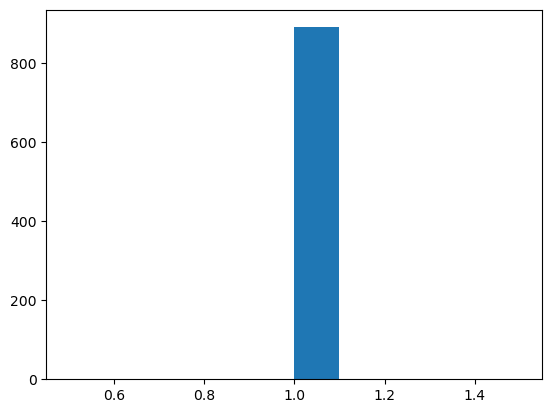

passenger_id


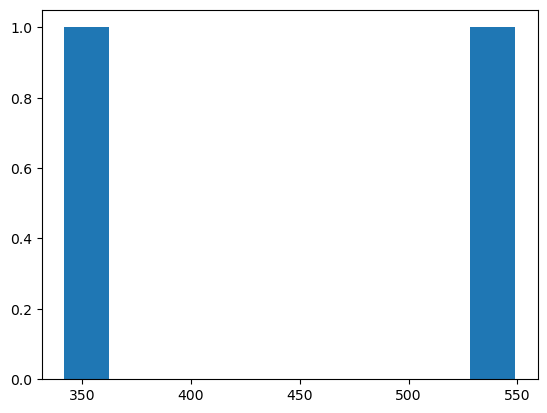

survived


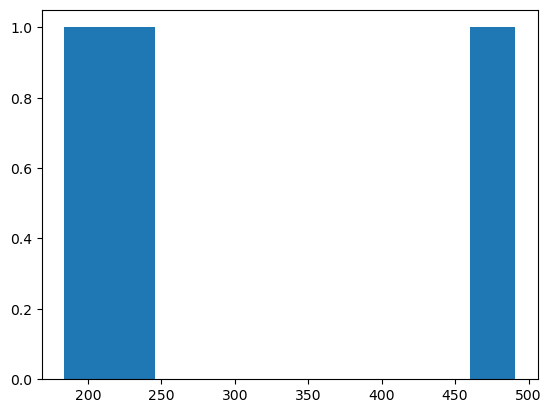

pclass


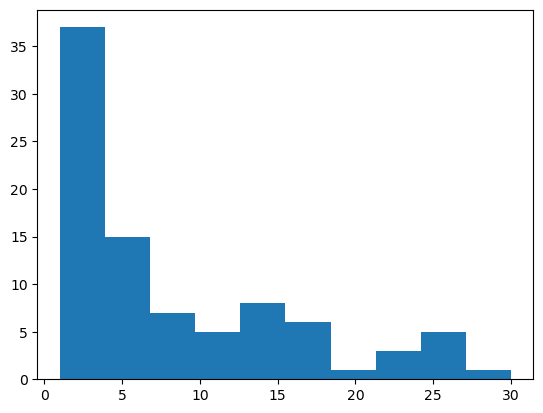

age


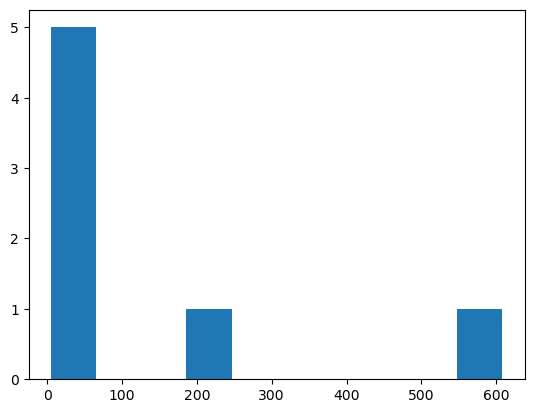

sibsp


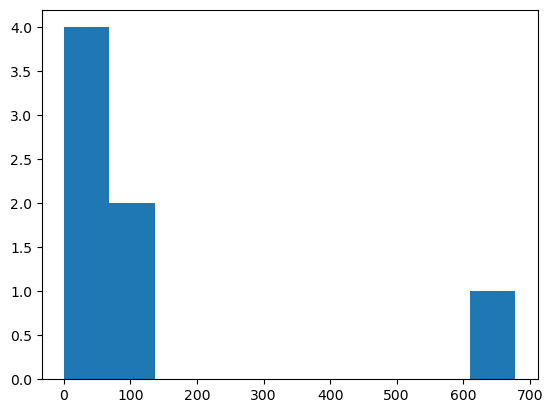

parch


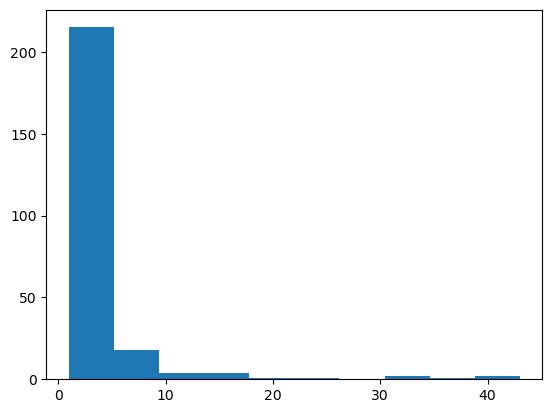

fare


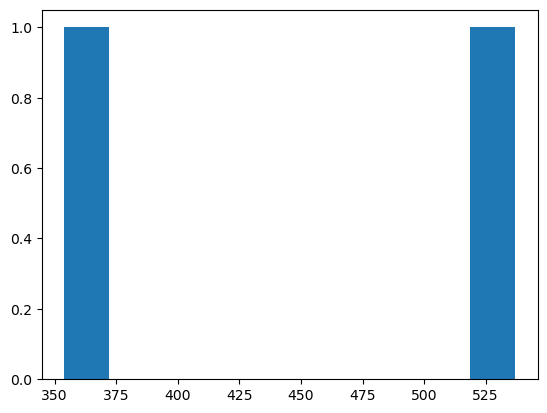

alone


In [8]:
#get string columns
for col in num_col:
    plt.hist(df[col].value_counts())
    plt.show()
    print(col)

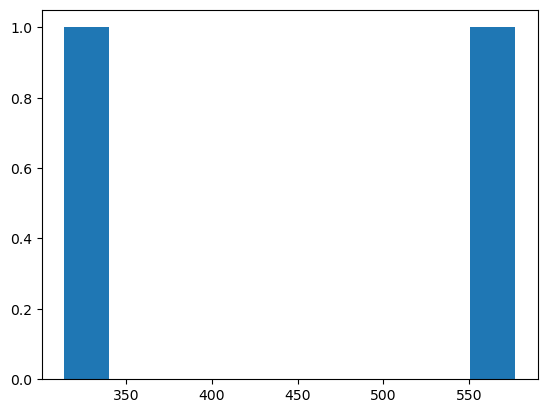

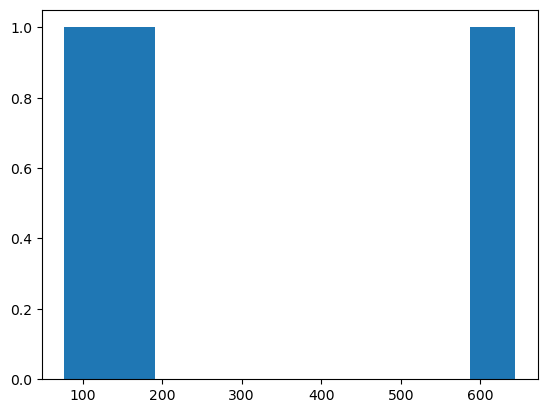

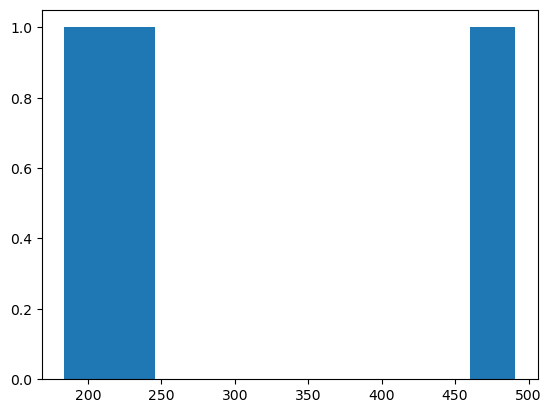

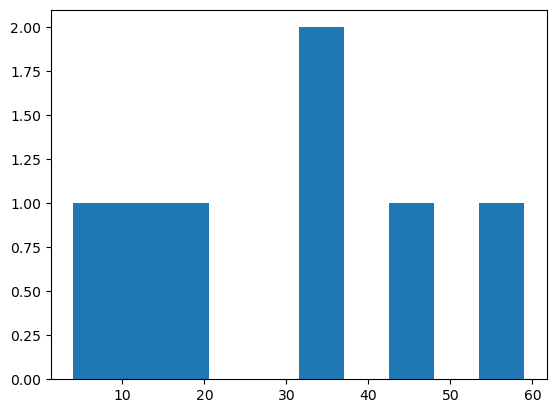

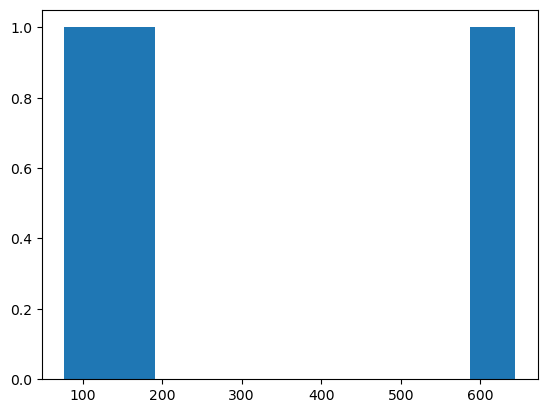

In [9]:
#plot distributions of string columns
str_col = df.columns [df.dtypes =='object']
for col in str_col:
    plt.hist(df[col].value_counts())
    plt.show()
    


# STEP 2: Clean the data

- take care of duplicates
- verify datatypes
- handle nulls
- consider outliers
- for modeling: make all columns numeric

Note: there are other things to consider in the prepare phase that we will talk about in future methodologies

### Duplicate Data

In [10]:
#look at data
df.head()
df.passenger_id.duplicated().value_counts()

False    891
Name: passenger_id, dtype: int64

#### are there any duplicates in passenger_id?

In [11]:

# df.embark_town.value_counts()
# df.embarked.value_counts()
# pd.crosstab(df.embarked, df.embark_town)
# df = df.drop(columns='embarked')
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


#### embarked and embark_town columns

In [12]:
#view counts across both
pd.crosstab(df.pclass, df['class'])

class,First,Second,Third
pclass,,,
1,216,0,0
2,0,184,0
3,0,0,491


In [13]:
#drop unnecessary column
df = df.drop(columns='class')

In [14]:
#verify
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,C,Cherbourg,1


#### pclass and class columns

In [15]:
#view counts across both
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,C,Cherbourg,1


**Note:** The machine learning models can only accept numeric values. Therefore, we will remove the class column instead the pclass column.

In [16]:
#drop unnecessary column


### Verify Datatypes

In [17]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
deck             object
embark_town      object
alone             int64
dtype: object

### Handle Nulls

some options
- delete all nulls rows
- delete that column
- fill with a median value (numeric columns) 
- fill with the mode (string columns)
- fill with with 0

Note: not all these answers will make sense for your column!!

In [18]:
#find were null values are
df.isnull().sum()
# fdf.isnull()ind the nulls in each row
# df[df.isnull() == False]
df.isnull().sum()[df.isnull().sum() > 0] #can mask to isolate the nulls


age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [19]:
#isolate nulls values
df.shape


(891, 12)

#### age

In [20]:
#check counts
df.age.value_counts(dropna=False) #to see the nulls too

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 89, dtype: int64

In [21]:
#check percentage
df.age.isnull().mean() #percentage of nulls in the series

0.19865319865319866

<AxesSubplot:ylabel='Frequency'>

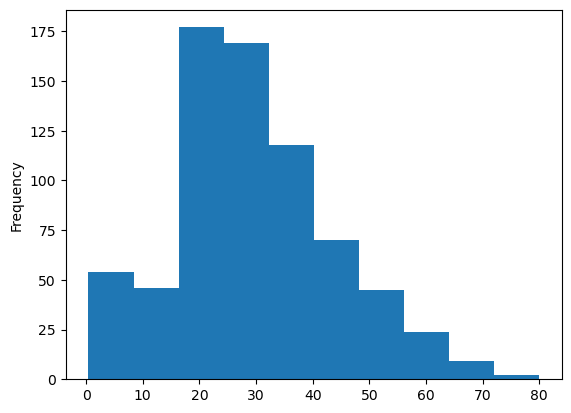

In [22]:
#plot it
df.age.plot.hist()
##delete the column 20 percent of the column is too much of the column

- there doesnt seem like an appropriate value to replace
- we will delete the entire column, for now
- with more time, i might come back and see if there is a way to keep the age column 

In [23]:
#drop
# df = df.drop(columns= 'embark_town')

df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,C,Cherbourg,1


In [24]:
#verify 


#### deck

In [25]:
df.deck.value_counts(dropna=False)

None    688
C        59
B        47
D        33
E        32
A        15
F        13
G         4
Name: deck, dtype: int64

In [26]:
df = df.drop(columns='deck')

- there are way too much null values
- will definitely delete this column

In [27]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,Cherbourg,1


In [28]:
df.embarked.value_counts(dropna=False)
##if there are very few nulls fill it in with the most popular value

S       644
C       168
Q        77
None      2
Name: embarked, dtype: int64

#### embark_town

In [29]:
#look at embark_town value counts with nulls


We could fill `embark_town` with most common value, 'Southampton', by hard-coding the value using the `fillna()` function

In [30]:
#fill it!

df.embarked.fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [31]:
#verify
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

### Outliers

options
- keep 
- remove
- stretch/compress

<AxesSubplot:>

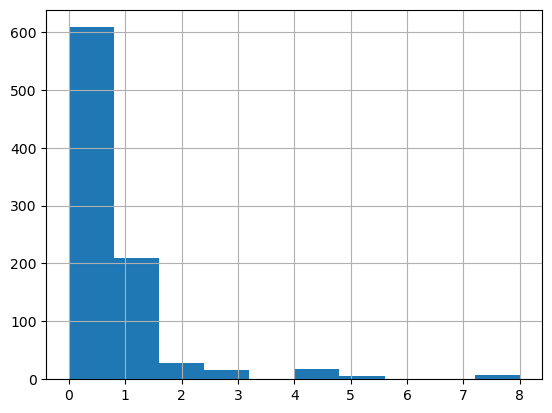

In [32]:
df.sibsp.hist()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Southampton,1


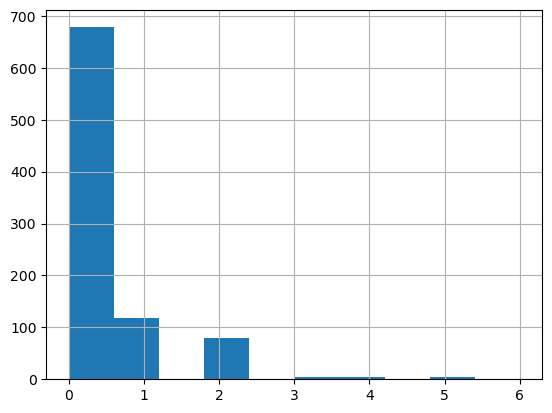

In [33]:
df.parch.hist()
df.head()


There are a few outliers potentially in sibsp, parch, but without specific domain knowledge related to the titanic, I am not going to remove those outliers or snap them/compress them, I will ignore them for now.

### For Modeling: Make all columns numeric (encode)
- machine learning models only work with numeric values

#### Therefore, we have to Encode!

- Encoding -- turning a string into a number


Two strategies:
- label encoding -- associate each unique value with a number
    - use the label encoder when the categories have an inherit order
- one-hot encoding (get_dummies) -- turn each unique value into a separate column with either 1 or 0
    - use one-hot encoding when there is no order 

*Note: Curse of dimensionality*
- An increase in the dimensions can, in theory, add more information to the data thereby improving the quality of data but practically increases the noise and redundancy during its analysis
- An increase in dimensionality it implies an increase in the number of features

also known as Hughes phenomenon: https://miro.medium.com/v2/resize:fit:1400/format:webp/1*pcJdd2y924Xk61SXa7uYpw.jpeg

#### one-hot encoding
- `pd.get_dummies`
- get dummy vars for both sex and embark_town columns

In [34]:
# df =df.drop(columns='embark_town')
# pd.get_dummies(df[['sex','embarked']])
dummy_df = pd.get_dummies(df[['sex','embarked']], drop_first=True)
# pd.get_dummies(df[['embarked']]).drop_duplicates()
dummy_df

,sex_male,embarked_Q,embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [53]:
#look at sex data
# df = pd.concat([df,dummy_df], axis=1)
# df = df.drop(columns='embark_town')
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,...,embarked_S,sex_male,embarked_Q,embarked_S,sex_male,embarked_Q,embarked_S,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.2500,S,0,...,1,1,0,1,1,0,1,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,...,1,0,0,1,0,0,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,0,...,1,0,0,1,0,0,1,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,1,...,1,1,0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,1,...,1,1,0,1,1,0,1,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,1,...,1,0,0,1,0,0,1,0,0,1
888,888,0,3,female,NaN,1,2,23.4500,S,0,...,1,0,0,1,0,0,1,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,1,...,0,1,0,0,1,0,0,1,0,0


In [36]:
#use get_dummies on sex data


In [37]:
#drop first column


In [38]:
# create dummy variables for 'sex' and 'embark_town'


In [39]:
# concatenate the dummy_df dataframe above with the original df and validate.


> i will keep my string values in my dataframe for now. as i will need them for exploration. 

### Now that everything is clean, lets make a function!

In [58]:
def clean_titanic(df):
    '''
    This function will clean the the titanic dataset
    '''
    df = df.drop(columns =['embarked','class','age','deck'])

    df.embark_town = df.embark_town.fillna(value='Southampton')

    dummy_df = pd.get_dummies(df[['sex','embark_town']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

Testing that the function does what we intend for it to do:

In [55]:
#acquire fresh copy of titanic function

SQL_query = '''select * from passengers'''
filename = "titanic.csv"
directory = '/Users/divante/codeup-data-science/classification_exercises'
url= f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/titanic_db'
fresh_df = acquire.get_titanic_data(SQL_query,filename,url)

In [59]:
df = clean_titanic(fresh_df)
df

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [42]:
#use clean function


# Step 3: Splitting

- Start with single dataframe
- End with three dataframes: train, validate, test
    - **train:** data to explore, clean, scale, and fit 
    - **validate, test:** represents unseen data
        - **validate:** confirm our top models have not overfit
        - **test:** test our top model -- ONLY USED ON 1 MODEL!

To accomplish this
- do two splits using sklean 
- train dataset should be the bulk of the dataframe ~60%
- validate should be about ~20%
- test should be about ~20%

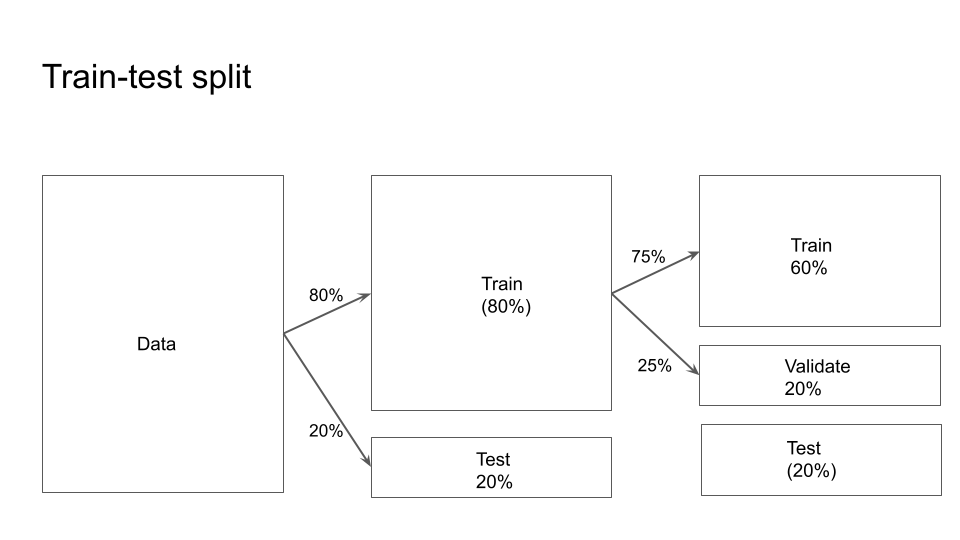

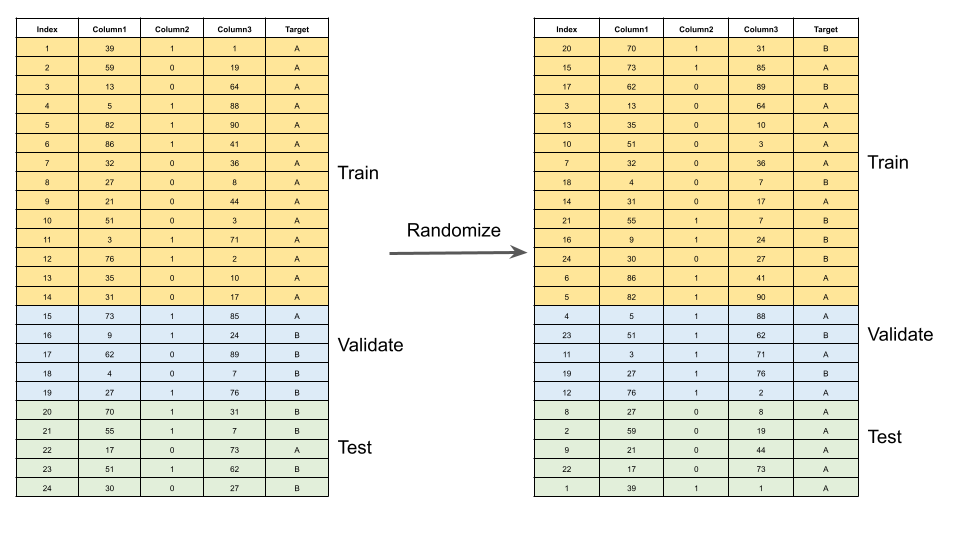

Our target variable contains A and B. Notice how many B values made it into the train dataset. 

Let's correct this by stratifing on our target variable.

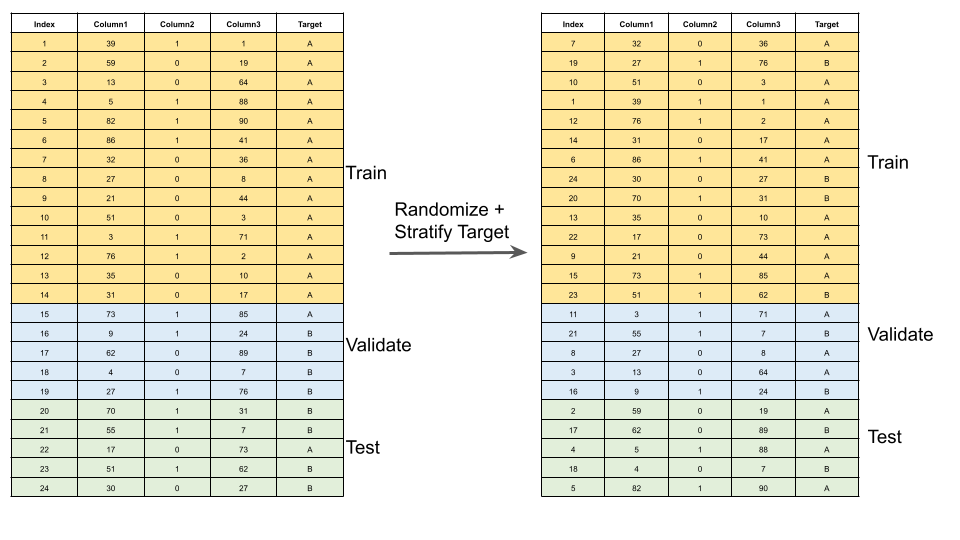

Sklearn allows us to split our data easily:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [60]:
# import splitting functions
from sklearn.model_selection import train_test_split

In [61]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [63]:
#first split
train, test = train_test_split(df, #dataframe
                 random_state=123, #setting my seed
                 test_size=.2, #setting the test size
                 stratify=df.survived) ## stratifying my target variable

In [65]:
# Observe split
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

#these show the size of the data

Prepared df: (891, 12)

Train: (712, 12)
Test: (179, 12)


In [68]:
len(train)/ len(df)

0.7991021324354658

In [69]:
len(test)/ len(df)

0.20089786756453423

Note: this is our first split. there is only train and test. we still need our second split for validate. 

In [71]:
#second split
train, validate = train_test_split(train, #dataframe
                 random_state=123, #setting my seed
                 test_size=.25, #setting the test size
                 stratify=train.survived) ## stratifying my target variable

In [ ]:
#second split


In [73]:
# Observe second split
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Prepared df: (891, 12)

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


- Train is now 60% of our data
- Validate is now 20% of our data
- Test is now 20% of our data

### Turn it into a function

In [74]:
def split_titanic(df):
    '''
    Takes in the titanic dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(df,
                                   test_size=.2, 
                                   random_state=123, 
                                   stratify=df.survived)
    train, validate = train_test_split(train, 
                                       test_size=.25, 
                                       random_state=123, 
                                       stratify=train.survived)
    return train, validate, test

Test our new function!

In [ ]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

### We can create a function made of both of our prepare functions!

In [77]:
# Another function? YES PLZ!
def prep_titanic_data(df):
    '''
    The ultimate dishwasher - clean data and split my titanic
    '''
    df = clean_titanic(df)
    train, validate, test = split_titanic(df)
    
    return train, validate, test

In [82]:
# Run final prepare function and validate what that the function is working properly.
SQL_query = '''select * from passengers'''
filename = "titanic.csv"
directory = '/Users/divante/codeup-data-science/classification_exercises'
url= f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/titanic_db'
df_fresh = acquire.get_titanic_data(SQL_query,filename,url)
train, validate, test = prep_titanic_data(df_fresh)

In [83]:
print(f'Clean df: {df_fresh.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Clean df: (891, 13)

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


All three functions that we created can be will be added to a .py file!
- clean_titanic
- split_titanic
- prep_titanic

We end our prepare phase with a prepare.py with all our functions

## Option for Missing Values: Impute


Impute: Assign a value to something by inference


Strategies for imputing:
- fill with 0
- fill with the average
- fill with the median
- fill with subgroup mean
- fill with most frequent value
- build a model to predict missing values



We will use `sklearn.imputer.SimpleImputer` to do this.  

0. Split data into train/validate/test
1. Create the imputer object
    - use determined strategy for impyting
2. Fit to train 
    - used determined strategy to calculated imputed value
    - updates imputer object
3. Transform train/validate/test
    - fill missing values with imputed value on our train, validate, and test df

### lets revisit our initial titanic dataset & fill in the nulls from embark_town

In [84]:
#get fresh titanic data
SQL_query = '''select * from passengers'''
filename = "titanic.csv"
directory = '/Users/divante/codeup-data-science/classification_exercises'
url= f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/titanic_db'
df_fresh = acquire.get_titanic_data(SQL_query,filename,url)
train, validate, test = prep_titanic_data(df_fresh)

In [87]:
#look at nulls of embark_town
df_fresh.embark_town.isnull().sum()

2

#### Step 0. Split data into train/validate/test

In [88]:
#split the data
train, validate, test = split_titanic(df_fresh)

In [89]:
print('embark_town nulls\n')
print(f'train nulls: {train.embark_town.isnull().sum()}')
print(f'validate nulls: {validate.embark_town.isnull().sum()}')
print(f'test nulls: {test.embark_town.isnull().sum()}')

embark_town nulls

train nulls: 1
validate nulls: 1
test nulls: 0


#### Step 1. Create the imputer object

Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (mean, median, most_frequent). Essentially, this is creating the instructions and assigning them to a variable, `imputer`.

In [90]:
# import imputing functions
from sklearn.impute import SimpleImputer

In [ ]:
# SimpleImputer?

In [111]:
# Define the thing using (strategy = 'most_frequent') finding most common value
imputer = SimpleImputer(strategy = 'most_frequent', missing_values = None)

#### Step 2. Fit to train 

This means that the imputer will determine the most_frequent value, or other value depending on the strategy called, for each column, in the training set only

In [112]:
# fit the thing using imputer.fit()
imputer.fit(train[['embarked']])

SimpleImputer(missing_values=None, strategy='most_frequent')

It will store that value in the imputer object. We can call different attributes to see what is stored in the importer. 

In [113]:
imputer.feature_names_in_

array(['embarked'], dtype=object)

In [114]:
imputer.statistics_

array(['S'], dtype=object)

#### Step 3. Transform train/validate/test

Use our imputer object to `transform`. We will call `transform` on our train, validate, and test datasets to fill any missing values.

In [115]:
# Use the thing using imputer.transform()
train[['embarked']] = imputer.transform(train[['embarked']])
validate[['embarked']] = imputer.transform(validate[['embarked']])
test[['embarked']] = imputer.transform(test[['embarked']])


In [116]:
# Validate that there are no longer any Null values in embark_town.
print('embarked nulls\n')
print(f'train nulls: {train.embarked.isnull().sum()}')
print(f'validate nulls: {validate.embarked.isnull().sum()}')
print(f'test nulls: {test.embarked.isnull().sum()}')

embarked nulls

train nulls: 0
validate nulls: 0
test nulls: 0
